In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as fourier #Transformda de fourier
from numpy import trapz #Integral de arrays


# Inciso a

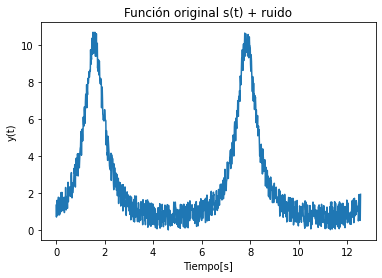

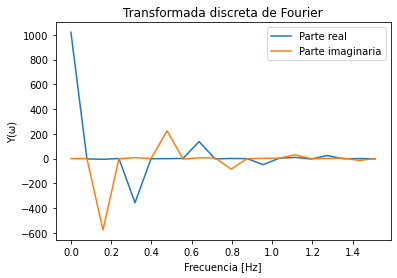

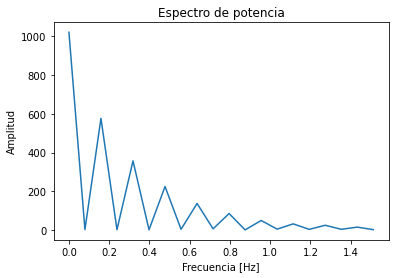

In [4]:
#Definimos los parametros iniciales


f=1/(2*np.pi) #frecuencia de la señal
T=1/f #periodo de la señal
w=2*np.pi*f
para=0.5

L=1000
dt=2*T/L
Fs=1/dt


t=dt*np.arange(0,L)


ruido=(3*np.random.random(len(t))-1)
y=10/(10-9*np.sin(w*t))+para*ruido

plt.plot(t,y,'-')
plt.xlabel("Tiempo[s]"),plt.ylabel("y(t)")
plt.title('Función original s(t) + ruido')
plt.show()

#Transformada de fourier
Ty=fourier.fft(y)/np.sqrt(2*np.pi)
F=Fs*np.arange(0,len(y))/len(y)

#plt.figure(figsize=(12,5))
#plt.subplot(121)
plt.plot(F[0:int(L//50)],Ty.real[0:int(L//50)],label="Parte real")
plt.plot(F[0:int(L//50)],Ty.imag[0:int(L//50)],label="Parte imaginaria")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Y(\u03C9)")
plt.title("Transformada discreta de Fourier")
plt.legend()
plt.plot()
plt.show()


#Espectro de potencia
MTy=np.abs(Ty)

plt.plot(F[0:int(L//50)],MTy[0:int(L//50)],"-")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Amplitud")
plt.title("Espectro de potencia")
plt.show()

# Autocorrelación

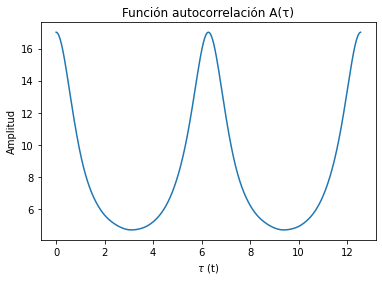

[]

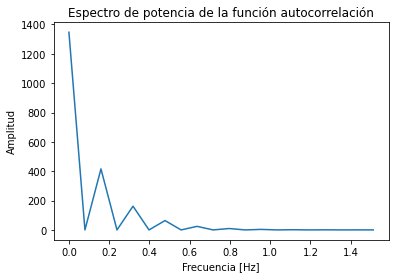

In [7]:
auto=[]
for i in t:   #intervalo de la funcion autocorrelacion mismo que el de la señal
    p1=10/(10-9*np.sin(w*(t)))+para*ruido
    p2=10/(10-9*np.sin(w*(t+i)))+para*ruido
    b=trapz(p1*p2,t) #area bajo los arrays
    auto.append(b)
auto=np.array(auto)/10

plt.plot(t,auto)
plt.xlabel('$\u03C4$ (t)')
plt.ylabel('Amplitud')
plt.title("Función autocorrelación A(\u03C4)")
plt.show()

#Transformada de la autocorrelacion
Ta=fourier.fft(auto)/np.sqrt(2*np.pi) #ver libro
Fa=Fs*np.arange(0,len(auto))/len(auto)

plt.plot(Fa[0:int(L//50)],Ta.real[0:int(L//50)]/np.sqrt(2*np.pi))
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Amplitud")
plt.title("Espectro de potencia de la función autocorrelación")
plt.plot()

# Valores del parametro

In [8]:
#Almacenamos los coeficientes dependiendo de que ruido representen
bajo,medio,alto=[0],[0],[0]
alpha=np.arange(0,100,0.1)
for p in alpha:
    x=np.sqrt(trapz((10/(10-9*np.sin(w*t))-10/(10-9*np.sin(w*t))-p*ruido)**2,t))
    if x<5:
        bajo.append(p)
        
    elif x<30:
        medio.append(p)
    else:
        alto.append(p)
        
    